In [73]:
#import every library out there
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from scipy.stats import expon
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from scipy import stats
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
import datetime
from time import time
import warnings
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding as LLE
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist
from sklearn.manifold import Isomap
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [74]:
data = pd.read_csv('cpuspec2017_data.csv')
data

,test_series,iteration_guid,bmc_name,bmc_version,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_name,...,sut_name,submitter_name,submitter_email,display,internal_use,external_use,ppog_version,a_b_name,pdat_name,last_updated
0,SPECrate2017_fp,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,P0,...,from-2017-sub/res2018q1/appr20180227/cpu2017-2...,xiangjunjie (A),confidential@spec.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SPECrate2017_fp,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,P0,...,from-2017-rsf/res2018q1/appr20180227/cpu2017-2...,xiangjunjie (A),confidential@spec.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SPECrate2017_fp,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,P0,...,from-2017-sub/res2018q3/appr20180710/cpu2017-2...,xiangjunjie (A),confidential@spec.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SPECrate2017_fp,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,P0,...,from-2017-sub/res2018q3/appr20180727/cpu2017-2...,xiangjunjie (A),confidential@spec.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SPECrate2017_fp,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,P0,...,from-2017-rsf/res2018q4/appr20181030/cpu2017-2...,xiangjunjie (A),confidential@spec.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20621,SPECrate2017_fp,fa61de41-e491-4099-8b48-1c6b0ab91033,quartz-7574.sppo,2.17,24.0,24.0,24.0,24.0,1.0,P0,...,sppo-quartz-7574,bob,bob@sppo-quartz-7574.sppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20622,SPECrate2017_fp,fc75beac-9317-42a6-a2b7-cafeda5b5edb,huambo-37dc.amd.com,2.17,12.0,12.0,12.0,12.0,1.0,P0,...,sut-huambo-37dc,jiahao,jiahao@sut-huambo-37dc.amd.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20623,SPECrate2017_fp,fc976b49-d799-479f-a93f-76273da37e1b,quartz-6535.sppo,2.17,24.0,24.0,24.0,24.0,1.0,P0,...,sppo-quartz-6535-devops,harshsharma,harshsharma@sppo-quartz-6535-devops.sppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20624,SPECrate2017_fp,fd724028-b03f-4805-a2bb-37c1f727795b,ethanolxf297.amd.com,3.14,6.0,6.0,6.0,6.0,1.0,P0,...,sppo-ethanolx-f297,bob,bob@sppo-ethanolx-f297.amd.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
#rogram_Name , per smbios_processor_version
data['smbios_processor_version']

0                  Intel Xeon Bronze 3104
1                  Intel Xeon Bronze 3104
2                  Intel Xeon Bronze 3104
3                  Intel Xeon Bronze 3106
4                  Intel Xeon Bronze 3104
                       ...               
20621     AMD EPYC 9B14 96-Core Processor
20622    AMD Eng Sample: 100-000001153-05
20623     AMD EPYC 9B14 96-Core Processor
20624     AMD EPYC 7D13 36-Core Processor
20625    AMD EPYC 8534P 64-Core Processor
Name: smbios_processor_version, Length: 20626, dtype: object

In [76]:
import pandas as pd
df=data
# Assuming 'feature_name' is the feature you want to use for categorization
category_counts = df['smbios_processor_version'].value_counts()

# 'category_counts' now contains the count of each unique value in 'feature_name'
# The most frequent category is the one with the highest count

most_frequent_category = category_counts.idxmax()
print(f"The most frequent category is: {most_frequent_category}")

# If you want to see the count for each category, you can print 'category_counts'
print("Category Counts:")
print(category_counts)

The most frequent category is: AMD EPYC 9654 96-Core Processor
Category Counts:
smbios_processor_version
AMD EPYC 9654 96-Core Processor             306
Intel Xeon Gold 5120                        299
Intel Xeon Platinum 8180                    296
Intel Xeon Gold 5118                        285
Intel Xeon Gold 6130                        275
                                           ... 
AMD Eng Sample: 100-000000508-01_37/30_N      1
AMD EPYC 7K62 48-Core Processor               1
AMD Eng Sample: 100-000000308-02_30/18_N      1
AMD Eng Sample: 100-000000425-02_37/23_N      1
AMD EPYC 9V33X 64-Core Processor              1
Name: count, Length: 395, dtype: int64


In [77]:
import pandas as pd


df=data
# Assuming 'feature_name' is the feature you want to use for categorization
category_df = df.groupby('smbios_processor_version')

# Now, 'category_df' is a grouped DataFrame where each group corresponds to a unique value in 'feature_name'
l=[]
# You can access each category using a loop, for example:
for category_name, category_data in category_df:
    # 'category_name' is the unique value in 'feature_name'
    # 'category_data' is the DataFrame corresponding to this category
    print(f"Category: {category_name}")
    l.append(category_data)
    # Perform operations specific to each category here

# If you want to access a specific category by its name:
specific_category = category_df.get_group('AMD EPYC 7203 8-Core Processor')


Category: AMD EPYC 7203 8-Core Processor
Category: AMD EPYC 7251
Category: AMD EPYC 7261
Category: AMD EPYC 7262
Category: AMD EPYC 7262 8-Core Processor
Category: AMD EPYC 7281
Category: AMD EPYC 7282 16-Core Processor
Category: AMD EPYC 72F3 8-Core Processor
Category: AMD EPYC 7301
Category: AMD EPYC 7302
Category: AMD EPYC 7302P
Category: AMD EPYC 7303 16-Core Processor
Category: AMD EPYC 7313 16-Core Processor
Category: AMD EPYC 7343 16-Core Processor
Category: AMD EPYC 7351
Category: AMD EPYC 7351P
Category: AMD EPYC 7352
Category: AMD EPYC 7352 24-Core Processor
Category: AMD EPYC 7371
Category: AMD EPYC 7373X 16-Core Processor
Category: AMD EPYC 73F3 16-Core Processor
Category: AMD EPYC 7401
Category: AMD EPYC 7401P
Category: AMD EPYC 7402
Category: AMD EPYC 7402 24-Core Processor
Category: AMD EPYC 7402P
Category: AMD EPYC 7413 24-Core Processor
Category: AMD EPYC 7443 24-Core Processor
Category: AMD EPYC 7451
Category: AMD EPYC 7452
Category: AMD EPYC 7452 32-Core Processor
Ca

In [78]:
data = specific_category

In [79]:
data

,test_series,iteration_guid,bmc_name,bmc_version,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_name,...,sut_name,submitter_name,submitter_email,display,internal_use,external_use,ppog_version,a_b_name,pdat_name,last_updated
16518,SPECrate2017_fp,15509011-4e3b-4792-b25f-c4562d527ba1,10.227.11.37,3.54,32.0,16.0,16.0,16.0,1.0,P0,...,sppo-daytona-037-ubuntu2004,bob,bob@sppo-daytona-037-ubuntu2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16698,SPECrate2017_fp,8478d5de-4969-4939-a7f2-124a72192ec7,EthanolX9CA9.sppo,3.5,16.0,16.0,16.0,16.0,1.0,P0,...,sppo-ethanolx-741c-lg02,vgannama,vgannama@sppo-ethanolx-741c-lg02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16729,SPECrate2017_fp,974561e0-688d-4a04-824b-d3fa15268c4a,10.227.11.37,3.54,32.0,16.0,16.0,16.0,1.0,P0,...,sppo-daytona-037-ubuntu2004,bob,bob@sppo-daytona-037-ubuntu2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16745,SPECrate2017_fp,a21eb0d7-ff8d-4542-8ce6-40b83d8276c1,EthanolX12CD.sppo,3.53,16.0,16.0,16.0,16.0,1.0,P0,...,sppo-ethanolx-8941-lg01,vgannama,vgannama@sppo-ethanolx-8941-lg01.sppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16799,SPECrate2017_fp,bf3318e0-6c47-49b3-8b0b-933d8356031f,EthanolX12CD.sppo,3.53,16.0,16.0,16.0,16.0,1.0,P0,...,sppo-ethanolx-8941-lg01,vgannama,vgannama@sppo-ethanolx-8941-lg01.sppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16873,SPECrate2017_fp,f732dc89-e4e9-40bc-9af8-b3f25283feec,EthanolX12CD.sppo,3.53,16.0,16.0,16.0,16.0,1.0,P0,...,sppo-ethanolx-8941-lg01,vgannama,vgannama@sppo-ethanolx-8941-lg01.sppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16922,SPECrate2017_fp,26e873bf-a09e-4d4e-a065-1f0b3030fc47,EthanolX9CA9.sppo,3.5,16.0,16.0,16.0,16.0,1.0,P0,...,sppo-ethanolx-741c-lg02,vgannama,vgannama@sppo-ethanolx-741c-lg02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17434,SPECrate2017_fp,80d8f9d5-3bdc-41e5-9613-7618115d9cc3,EthanolX12CD.sppo,3.53,16.0,16.0,16.0,16.0,1.0,P0,...,sppo-ethanolx-8941-lg01,vgannama,vgannama@sppo-ethanolx-8941-lg01.sppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17435,SPECrate2017_fp,81afa9ff-134a-4c0c-b53d-6ccba750d949,10.227.11.37,3.54,32.0,16.0,16.0,16.0,1.0,P0,...,sppo-daytona-037-ubuntu2004,bob,bob@sppo-daytona-037-ubuntu2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17533,SPECrate2017_fp,bf6280ac-6549-47bc-80dd-cd14d0820998,EthanolX12CD.sppo,3.53,16.0,16.0,16.0,16.0,1.0,P0,...,sppo-ethanolx-8941-lg01,vgannama,vgannama@sppo-ethanolx-8941-lg01.sppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
#We can compute the (linear) Pearson's correlation coefficient between pairs of attributes
#with the method corr() :
corr_matrix = data.corr(method='pearson',numeric_only=True).head(10)
corr_matrix

,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_fclk_mhz,socket0_mclk_mhz,socket0_cclk_mhz,socket0_lclk_mhz,socket0_uclk_mhz,...,socket0_dimms_count,socket0_memory_channels_count,socket0_memory_manufacturers_count,socket0_memory_ranks_count,socket1_dimms_count,socket1_memory_channels_count,socket1_memory_manufacturers_count,socket1_memory_ranks_count,a_b_name,pdat_name
dimm_slots_total,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dimm_slots_populated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
memory_channels_total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
memory_channels_populated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dimms_per_channel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
socket0_fclk_mhz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
socket0_mclk_mhz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
socket0_cclk_mhz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
socket0_lclk_mhz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
socket0_uclk_mhz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
df=data
# Assuming df is your DataFrame and non_numeric_columns is a list of columns
non_numeric_columns = df.select_dtypes(exclude=[np.number, 'boolean']).columns
non_numeric_columns

Index(['test_series', 'iteration_guid', 'bmc_name', 'bmc_version',
       'socket0_name', 'socket0_iod_name', 'socket0_iod_serial_number',
       'socket0_ccd000_serial_number', 'socket0_ccd000_name',
       'socket0_ccd000_short_name',
       ...
       'iteration_start_date', 'iteration_stop_date', 'sut_name',
       'submitter_name', 'submitter_email', 'display', 'internal_use',
       'external_use', 'ppog_version', 'last_updated'],
      dtype='object', length=440)

In [82]:
df_cleaned = df.drop(columns=non_numeric_columns)
# Check the resulting DataFrame
df_cleaned

,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_fclk_mhz,socket0_mclk_mhz,socket0_cclk_mhz,socket0_lclk_mhz,socket0_uclk_mhz,...,socket0_dimms_count,socket0_memory_channels_count,socket0_memory_manufacturers_count,socket0_memory_ranks_count,socket1_dimms_count,socket1_memory_channels_count,socket1_memory_manufacturers_count,socket1_memory_ranks_count,a_b_name,pdat_name
16518,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,NaN,NaN
16698,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,NaN,NaN
16729,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,NaN,NaN
16745,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,NaN,NaN
16799,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,NaN,NaN
16873,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,NaN,NaN
16922,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,NaN,NaN
17434,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,NaN,NaN
17435,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,NaN,NaN
17533,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,NaN,NaN


In [83]:
df_cleaned

,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_fclk_mhz,socket0_mclk_mhz,socket0_cclk_mhz,socket0_lclk_mhz,socket0_uclk_mhz,...,socket0_dimms_count,socket0_memory_channels_count,socket0_memory_manufacturers_count,socket0_memory_ranks_count,socket1_dimms_count,socket1_memory_channels_count,socket1_memory_manufacturers_count,socket1_memory_ranks_count,a_b_name,pdat_name
16518,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,NaN,NaN
16698,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,NaN,NaN
16729,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,NaN,NaN
16745,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,NaN,NaN
16799,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,NaN,NaN
16873,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,NaN,NaN
16922,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,NaN,NaN
17434,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,NaN,NaN
17435,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,NaN,NaN
17533,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,NaN,NaN


In [84]:
numeric_cols = data.select_dtypes(include=['number','boolean']).columns
numeric_cols

Index(['dimm_slots_total', 'dimm_slots_populated', 'memory_channels_total',
       'memory_channels_populated', 'dimms_per_channel', 'socket0_fclk_mhz',
       'socket0_mclk_mhz', 'socket0_cclk_mhz', 'socket0_lclk_mhz',
       'socket0_uclk_mhz',
       ...
       'socket0_dimms_count', 'socket0_memory_channels_count',
       'socket0_memory_manufacturers_count', 'socket0_memory_ranks_count',
       'socket1_dimms_count', 'socket1_memory_channels_count',
       'socket1_memory_manufacturers_count', 'socket1_memory_ranks_count',
       'a_b_name', 'pdat_name'],
      dtype='object', length=284)

In [85]:
import pandas as pd

# Assuming df is your DataFrame with mixed data types
threshold_missing = 0.5  # Adjust the threshold based on your criteria

# Separate numeric and non-numeric columns
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
non_numeric_cols = df_cleaned.select_dtypes(exclude=['number']).columns

# Drop columns with a high percentage of missing values for numeric columns
df_numeric_cleaned = df_cleaned[numeric_cols].dropna(axis=1, thresh=int((1 - threshold_missing) * len(df_cleaned[numeric_cols])))

# Impute missing values for remaining numeric columns
df_numeric_cleaned = df_numeric_cleaned.fillna(df_numeric_cleaned.mean())

# Keep non-numeric columns
df_non_numeric = df_cleaned[non_numeric_cols]

# Concatenate the cleaned numeric and non-numeric DataFrames
df_cleaned = pd.concat([df_numeric_cleaned, df_non_numeric], axis=1)
df_cleaned

,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_fclk_mhz,socket0_mclk_mhz,socket0_cclk_mhz,socket0_lclk_mhz,socket0_uclk_mhz,...,system_memory_manufacturers_count,system_memory_ranks_count,socket0_dimms_count,socket0_memory_channels_count,socket0_memory_manufacturers_count,socket0_memory_ranks_count,socket1_dimms_count,socket1_memory_channels_count,socket1_memory_manufacturers_count,socket1_memory_ranks_count
16518,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
16698,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
16729,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
16745,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
16799,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
16873,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
16922,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
17434,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
17435,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
17533,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0


# Data Pre processing

In [86]:
import pandas as pd

# Assuming df_cleaned is your DataFrame with mixed data types
threshold_correlation = 0.8  # Adjust the correlation threshold

# Separate numeric and non-numeric columns
#numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
#on_numeric_cols = df_cleaned.select_dtypes(exclude=['number']).columns

# Calculate correlation matrix for numeric columns
correlation_matrix_numeric = df_cleaned.corr()
correlation_matrix_numeric
# Identify highly correlated columns
highly_correlated = set()
for i in range(len(correlation_matrix_numeric.columns)):
    for j in range(i):
        if abs(correlation_matrix_numeric.iloc[i, j]) > threshold_correlation:
            colname = correlation_matrix_numeric.columns[i]
            highly_correlated.add(colname)
highly_correlated
# # Drop highly correlated columns for numeric columns
# df_cleaned_numeric = df_cleaned[numeric_cols].drop(columns=highly_correlated)

# # # Concatenate cleaned numeric and non-numeric DataFrames
# df_cleaned = pd.concat([df_cleaned_numeric, df_cleaned[non_numeric_cols]], axis=1)
# df_cleaned

{'kafka_offset',
 'memory_speed_in_mts',
 'os_memory_size_in_kib',
 's503_bwaves_r_base_0_ratio',
 's503_bwaves_r_base_0_reported_time',
 's507_cactubssn_r_base_0_ratio',
 's507_cactubssn_r_base_0_reported_time',
 's508_namd_r_base_0_ratio',
 's508_namd_r_base_0_reported_time',
 's510_parest_r_base_0_ratio',
 's510_parest_r_base_0_reported_time',
 's511_povray_r_base_0_ratio',
 's511_povray_r_base_0_reported_time',
 's519_lbm_r_base_0_ratio',
 's519_lbm_r_base_0_reported_time',
 's521_wrf_r_base_0_ratio',
 's521_wrf_r_base_0_reported_time',
 's526_blender_r_base_0_ratio',
 's526_blender_r_base_0_reported_time',
 's527_cam4_r_base_0_ratio',
 's527_cam4_r_base_0_reported_time',
 's538_imagick_r_base_0_ratio',
 's538_imagick_r_base_0_reported_time',
 's544_nab_r_base_0_ratio',
 's544_nab_r_base_0_reported_time',
 's549_fotonik3d_r_base_0_ratio',
 's549_fotonik3d_r_base_0_reported_time',
 's554_roms_r_base_0_ratio',
 's554_roms_r_base_0_reported_time'}

In [87]:
#We can compute the (linear) Pearson's correlation coefficient between pairs of attributes
#with the method corr() :
regression_data = df_cleaned
corr_matrix = regression_data.corr(method='pearson',numeric_only=True)
corr_matrix

,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_fclk_mhz,socket0_mclk_mhz,socket0_cclk_mhz,socket0_lclk_mhz,socket0_uclk_mhz,...,system_memory_manufacturers_count,system_memory_ranks_count,socket0_dimms_count,socket0_memory_channels_count,socket0_memory_manufacturers_count,socket0_memory_ranks_count,socket1_dimms_count,socket1_memory_channels_count,socket1_memory_manufacturers_count,socket1_memory_ranks_count
dimm_slots_total,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dimm_slots_populated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
memory_channels_total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
memory_channels_populated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dimms_per_channel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
socket0_memory_ranks_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
socket1_dimms_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
socket1_memory_channels_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
socket1_memory_manufacturers_count,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
import sweetviz as sv

report = sv.analyze(df_cleaned)
report.show_html('report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [89]:
 df_cleaned

,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_fclk_mhz,socket0_mclk_mhz,socket0_cclk_mhz,socket0_lclk_mhz,socket0_uclk_mhz,...,system_memory_manufacturers_count,system_memory_ranks_count,socket0_dimms_count,socket0_memory_channels_count,socket0_memory_manufacturers_count,socket0_memory_ranks_count,socket1_dimms_count,socket1_memory_channels_count,socket1_memory_manufacturers_count,socket1_memory_ranks_count
16518,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
16698,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
16729,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
16745,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
16799,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
16873,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
16922,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
17434,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
17435,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
17533,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0


In [90]:
data = df_cleaned

In [91]:
data

,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_fclk_mhz,socket0_mclk_mhz,socket0_cclk_mhz,socket0_lclk_mhz,socket0_uclk_mhz,...,system_memory_manufacturers_count,system_memory_ranks_count,socket0_dimms_count,socket0_memory_channels_count,socket0_memory_manufacturers_count,socket0_memory_ranks_count,socket1_dimms_count,socket1_memory_channels_count,socket1_memory_manufacturers_count,socket1_memory_ranks_count
16518,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
16698,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
16729,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
16745,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
16799,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
16873,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
16922,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
17434,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
17435,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0
17533,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0


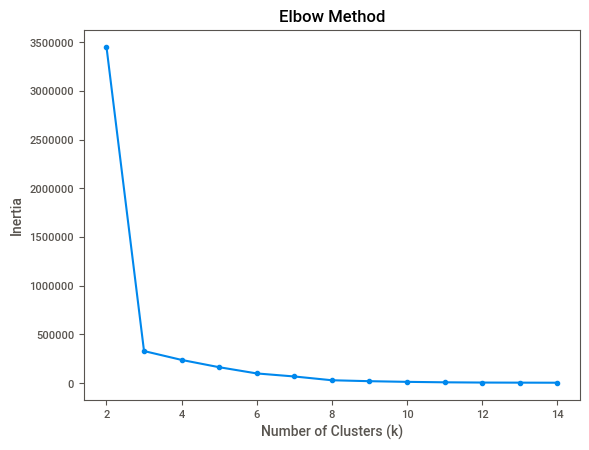

In [92]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming scaled_data is your standardized data
inertias = []
possible_k_values = range(2, 15)  # You can adjust the range based on your data

for k in possible_k_values:
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(possible_k_values, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [93]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Assuming 'data' is your dataset with columns for min Gflops, max Gflops, and different tests
test_data = data
# Extract relevant columns
#test_columns = data.columns[2:]  # Assuming columns 0 and 1 are for min and max Gflops
#X = data[['basemean', 'peakmean'] + test_columns]
columns_to_exclude = ['basemean', 'peakmean']
filtered_data = test_data.drop(columns=columns_to_exclude)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# # Choose the number of clusters (you may need to adjust this based on your data)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# # Visualize clusters in 3D (assuming you have at least three test columns)
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# for cluster in range(n_clusters):
#     cluster_data = data[data['cluster'] == cluster]
#     ax.scatter(cluster_data['basemean'], cluster_data['peakmean'], cluster_data[filtered_data[0]],
#                label=f'Cluster {cluster + 1}')

# ax.set_xlabel('Min Gflops')
# ax.set_ylabel('Max Gflops')
# ax.set_zlabel(test_columns[0])
# ax.set_title('Clustering Visualization')
# ax.legend()

# plt.show()
#filtered_data
data.columns

Index(['dimm_slots_total', 'dimm_slots_populated', 'memory_channels_total',
       'memory_channels_populated', 'dimms_per_channel', 'socket0_fclk_mhz',
       'socket0_mclk_mhz', 'socket0_cclk_mhz', 'socket0_lclk_mhz',
       'socket0_uclk_mhz', 'socket0_ccd000_die_number', 'ctdp_in_watts',
       'smbios_processor_frequency_in_mhz', 'numa_zones', 'packages',
       'processor_family', 'processor_model', 'processor_stepping',
       'numa_nodes_per_socket', 'iterations', 'basecopies', 'basemean',
       'peakmean', 's503_bwaves_r_base_0_reported_time',
       's503_bwaves_r_base_0_ratio', 's507_cactubssn_r_base_0_reported_time',
       's507_cactubssn_r_base_0_ratio', 's508_namd_r_base_0_reported_time',
       's508_namd_r_base_0_ratio', 's510_parest_r_base_0_reported_time',
       's510_parest_r_base_0_ratio', 's511_povray_r_base_0_reported_time',
       's511_povray_r_base_0_ratio', 's519_lbm_r_base_0_reported_time',
       's519_lbm_r_base_0_ratio', 's521_wrf_r_base_0_reported_time

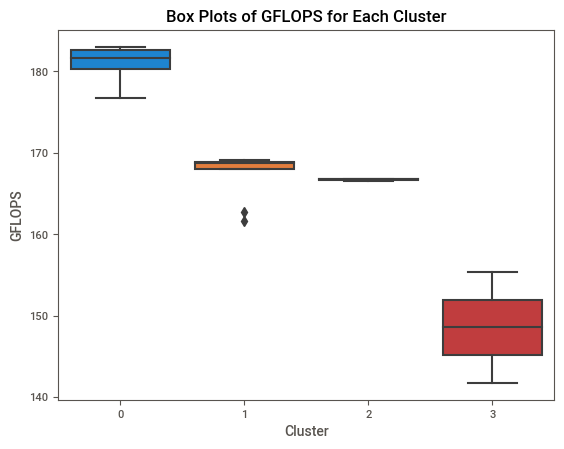

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='cluster', y='basemean', data=data)
plt.xlabel('Cluster')
plt.ylabel('GFLOPS')
plt.title('Box Plots of GFLOPS for Each Cluster')
plt.show()

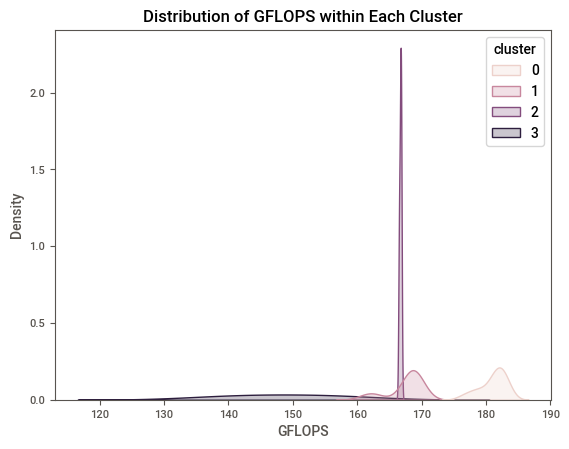

In [95]:
sns.kdeplot(x='basemean', hue='cluster', data=data, fill=True, common_norm=False)
plt.xlabel('GFLOPS')
plt.title('Distribution of GFLOPS within Each Cluster')
plt.show()

In [96]:
df.columns

Index(['test_series', 'iteration_guid', 'bmc_name', 'bmc_version',
       'dimm_slots_total', 'dimm_slots_populated', 'memory_channels_total',
       'memory_channels_populated', 'dimms_per_channel', 'socket0_name',
       ...
       'sut_name', 'submitter_name', 'submitter_email', 'display',
       'internal_use', 'external_use', 'ppog_version', 'a_b_name', 'pdat_name',
       'last_updated'],
      dtype='object', length=724)

In [97]:
specific_category

,test_series,iteration_guid,bmc_name,bmc_version,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_name,...,sut_name,submitter_name,submitter_email,display,internal_use,external_use,ppog_version,a_b_name,pdat_name,last_updated
16518,SPECrate2017_fp,15509011-4e3b-4792-b25f-c4562d527ba1,10.227.11.37,3.54,32.0,16.0,16.0,16.0,1.0,P0,...,sppo-daytona-037-ubuntu2004,bob,bob@sppo-daytona-037-ubuntu2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16698,SPECrate2017_fp,8478d5de-4969-4939-a7f2-124a72192ec7,EthanolX9CA9.sppo,3.5,16.0,16.0,16.0,16.0,1.0,P0,...,sppo-ethanolx-741c-lg02,vgannama,vgannama@sppo-ethanolx-741c-lg02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16729,SPECrate2017_fp,974561e0-688d-4a04-824b-d3fa15268c4a,10.227.11.37,3.54,32.0,16.0,16.0,16.0,1.0,P0,...,sppo-daytona-037-ubuntu2004,bob,bob@sppo-daytona-037-ubuntu2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16745,SPECrate2017_fp,a21eb0d7-ff8d-4542-8ce6-40b83d8276c1,EthanolX12CD.sppo,3.53,16.0,16.0,16.0,16.0,1.0,P0,...,sppo-ethanolx-8941-lg01,vgannama,vgannama@sppo-ethanolx-8941-lg01.sppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16799,SPECrate2017_fp,bf3318e0-6c47-49b3-8b0b-933d8356031f,EthanolX12CD.sppo,3.53,16.0,16.0,16.0,16.0,1.0,P0,...,sppo-ethanolx-8941-lg01,vgannama,vgannama@sppo-ethanolx-8941-lg01.sppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16873,SPECrate2017_fp,f732dc89-e4e9-40bc-9af8-b3f25283feec,EthanolX12CD.sppo,3.53,16.0,16.0,16.0,16.0,1.0,P0,...,sppo-ethanolx-8941-lg01,vgannama,vgannama@sppo-ethanolx-8941-lg01.sppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16922,SPECrate2017_fp,26e873bf-a09e-4d4e-a065-1f0b3030fc47,EthanolX9CA9.sppo,3.5,16.0,16.0,16.0,16.0,1.0,P0,...,sppo-ethanolx-741c-lg02,vgannama,vgannama@sppo-ethanolx-741c-lg02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17434,SPECrate2017_fp,80d8f9d5-3bdc-41e5-9613-7618115d9cc3,EthanolX12CD.sppo,3.53,16.0,16.0,16.0,16.0,1.0,P0,...,sppo-ethanolx-8941-lg01,vgannama,vgannama@sppo-ethanolx-8941-lg01.sppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17435,SPECrate2017_fp,81afa9ff-134a-4c0c-b53d-6ccba750d949,10.227.11.37,3.54,32.0,16.0,16.0,16.0,1.0,P0,...,sppo-daytona-037-ubuntu2004,bob,bob@sppo-daytona-037-ubuntu2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17533,SPECrate2017_fp,bf6280ac-6549-47bc-80dd-cd14d0820998,EthanolX12CD.sppo,3.53,16.0,16.0,16.0,16.0,1.0,P0,...,sppo-ethanolx-8941-lg01,vgannama,vgannama@sppo-ethanolx-8941-lg01.sppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [98]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Assuming 'data' is your dataset with columns for min Gflops, max Gflops, and different tests
test_data = data
# Extract relevant columns
#test_columns = data.columns[2:]  # Assuming columns 0 and 1 are for min and max Gflops
#X = data[['basemean', 'peakmean'] + test_columns]
columns_to_exclude = ['basemean', 'peakmean']
filtered_data = test_data.drop(columns=columns_to_exclude)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)

# # Choose the number of clusters (you may need to adjust this based on your data)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data['cluster'] = kmeans.fit_predict(X_scaled)

# # Visualize clusters in 3D (assuming you have at least three test columns)
# fig = plt.figure(figsize=(10, 8))
# ax = fig.add_subplot(111, projection='3d')

# for cluster in range(n_clusters):
#     cluster_data = data[data['cluster'] == cluster]
#     ax.scatter(cluster_data['basemean'], cluster_data['peakmean'], cluster_data[filtered_data[0]],
#                label=f'Cluster {cluster + 1}')

# ax.set_xlabel('Min Gflops')
# ax.set_ylabel('Max Gflops')
# ax.set_zlabel(test_columns[0])
# ax.set_title('Clustering Visualization')
# ax.legend()

# plt.show()
#filtered_data
data

,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_fclk_mhz,socket0_mclk_mhz,socket0_cclk_mhz,socket0_lclk_mhz,socket0_uclk_mhz,...,system_memory_ranks_count,socket0_dimms_count,socket0_memory_channels_count,socket0_memory_manufacturers_count,socket0_memory_ranks_count,socket1_dimms_count,socket1_memory_channels_count,socket1_memory_manufacturers_count,socket1_memory_ranks_count,cluster
16518,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,0
16698,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,0
16729,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,2
16745,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,1
16799,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,1
16873,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,1
16922,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,0
17434,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,1
17435,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,2
17533,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,1


In [99]:
import pandas as pd

# Assuming your DataFrame is named 'data'
nan_counts_per_column = selected_columns.isna().sum()

# Display the count of NaN values for each column
print(nan_counts_per_column)


basemean    0
dtype: int64


In [100]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = df.corr()

# Extract correlation coefficients with the target variable
correlation_with_target = correlation_matrix['basemean'].drop('basemean')

# Visualize correlations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.xlabel('Organ Test Columns')
plt.ylabel('Correlation with Overall Organ Score')
plt.title('Correlation Analysis')
plt.xticks(rotation=45, ha='right')
plt.show()


ValueError: could not convert string to float: 'SPECrate2017_fp'

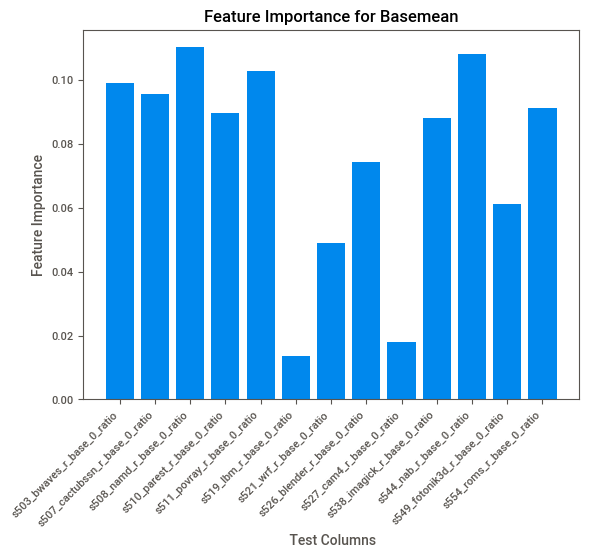

In [101]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
df=data
selected_columns = df.filter(regex=r'^s5.*ratio$|basemean')
# Assuming df is your DataFrame
X = selected_columns.drop('basemean', axis=1)  # Features (organ test columns)
y = selected_columns['basemean']   # Target variable (overall organ score)

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X, y)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a bar plot of feature importances
plt.bar(X.columns, feature_importances)
plt.xlabel(' Test Columns')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Basemean')
plt.xticks(rotation=45, ha='right')
plt.show()


In [102]:
selected_columns

,basemean,s503_bwaves_r_base_0_ratio,s507_cactubssn_r_base_0_ratio,s508_namd_r_base_0_ratio,s510_parest_r_base_0_ratio,s511_povray_r_base_0_ratio,s519_lbm_r_base_0_ratio,s521_wrf_r_base_0_ratio,s526_blender_r_base_0_ratio,s527_cam4_r_base_0_ratio,s538_imagick_r_base_0_ratio,s544_nab_r_base_0_ratio,s549_fotonik3d_r_base_0_ratio,s554_roms_r_base_0_ratio
16518,182.103324,552.836352,241.933344,96.166400,173.930688,150.708864,99.248928,178.315168,151.529568,144.084832,523.155776,189.524384,178.873312,104.816640
16698,183.016813,557.983648,246.806912,96.388352,171.933536,151.615232,99.758336,176.466336,154.381472,138.064000,525.428928,195.495200,181.884288,106.547712
16729,166.804753,525.559392,223.618944,88.092000,157.282144,138.737312,77.675712,163.847328,141.401952,134.729120,481.004096,179.225472,167.516960,97.841056
16745,169.051131,503.462464,218.518240,91.377056,159.640672,140.527360,90.420128,166.156000,145.119200,138.858144,487.368704,183.122048,159.530656,94.736832
16799,168.846529,501.991808,222.159744,89.547904,159.814272,140.235776,89.532000,166.345632,145.105888,138.587936,489.014080,181.649312,161.331776,94.369312
16873,162.691186,494.812192,211.809760,85.778592,153.540928,134.386656,85.008480,159.195584,140.067200,134.141216,468.561312,174.770400,157.304800,92.070080
16922,180.673270,556.593088,245.646720,96.210208,173.220288,151.131776,90.247520,177.557792,152.872800,138.317600,522.381664,189.196128,180.603552,104.951136
17434,168.825586,504.005120,222.024800,89.443456,160.329664,139.972032,87.747136,169.063616,145.288928,139.582656,488.464448,181.105600,160.621600,94.263040
17435,166.524151,525.914656,224.198272,88.064640,157.563456,138.813312,77.181440,162.595008,140.863904,131.726816,484.438496,179.471328,168.806816,97.555232
17533,168.748445,501.761568,221.152640,89.533696,160.015296,140.577632,86.545824,171.791552,144.990688,137.981184,481.738656,184.157696,161.559136,94.432736


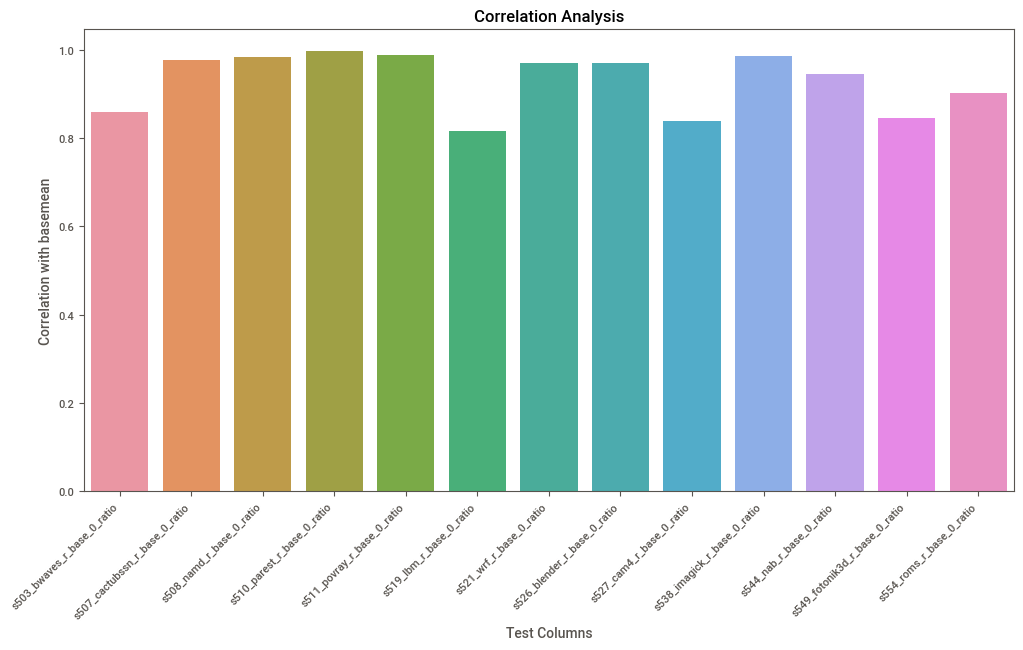

In [103]:
import seaborn as sns
# Assuming df is your DataFrame
selected_columns = df.filter(regex=r'^s5.*ratio$|basemean')

# Display the selected columns
#print(selected_columns)

# Calculate correlation matrix
correlation_matrix = selected_columns.corr()

# Extract correlation coefficients with the target variable
correlation_with_target = correlation_matrix['basemean'].drop('basemean')

# Visualize correlations
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.xlabel('Test Columns')
plt.ylabel('Correlation with basemean')
plt.title('Correlation Analysis')
plt.xticks(rotation=45, ha='right')
plt.show()


In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
selected_columns = df.filter(regex=r'^s5.*ratio$|basemean')
# Assuming you have a dataset 'X' and target variable 'y'
# Replace this with your actual dataset and target variable
X = selected_columns.drop('basemean', axis=1)  # Features (organ test columns)
y = selected_columns['basemean'] 
X

rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X, y)

y_pred = rf_model.predict(X)


In [105]:
#We can compute the (linear) Pearson's correlation coefficient between pairs of attributes
#with the method corr() :
regression_data = selected_columns
corr_matrix = regression_data.corr(method='pearson',numeric_only=True)
corr_matrix

,basemean,s503_bwaves_r_base_0_ratio,s507_cactubssn_r_base_0_ratio,s508_namd_r_base_0_ratio,s510_parest_r_base_0_ratio,s511_povray_r_base_0_ratio,s519_lbm_r_base_0_ratio,s521_wrf_r_base_0_ratio,s526_blender_r_base_0_ratio,s527_cam4_r_base_0_ratio,s538_imagick_r_base_0_ratio,s544_nab_r_base_0_ratio,s549_fotonik3d_r_base_0_ratio,s554_roms_r_base_0_ratio
basemean,1.000000,0.859520,0.976501,0.984515,0.995979,0.988874,0.814953,0.969913,0.969558,0.838593,0.986776,0.945722,0.846279,0.901904
s503_bwaves_r_base_0_ratio,0.859520,1.000000,0.915491,0.782798,0.857011,0.799291,0.574031,0.773272,0.732291,0.528469,0.795771,0.715564,0.979823,0.985630
s507_cactubssn_r_base_0_ratio,0.976501,0.915491,1.000000,0.939500,0.971447,0.954423,0.743754,0.928889,0.912679,0.753838,0.950207,0.886041,0.910056,0.947256
s508_namd_r_base_0_ratio,0.984515,0.782798,0.939500,1.000000,0.982595,0.994468,0.790575,0.969774,0.989814,0.889746,0.994834,0.975051,0.757714,0.827576
s510_parest_r_base_0_ratio,0.995979,0.857011,0.971447,0.982595,1.000000,0.987609,0.796098,0.969502,0.969308,0.840009,0.984862,0.944587,0.840984,0.892278
s511_povray_r_base_0_ratio,0.988874,0.799291,0.954423,0.994468,0.987609,1.000000,0.784481,0.968064,0.989396,0.875808,0.997789,0.974919,0.779132,0.843254
s519_lbm_r_base_0_ratio,0.814953,0.574031,0.743754,0.790575,0.796098,0.784481,1.000000,0.779467,0.799596,0.657810,0.777023,0.720733,0.609067,0.674754
s521_wrf_r_base_0_ratio,0.969913,0.773272,0.928889,0.969774,0.969502,0.968064,0.779467,1.000000,0.961836,0.887382,0.966744,0.941243,0.759007,0.820947
s526_blender_r_base_0_ratio,0.969558,0.732291,0.912679,0.989814,0.969308,0.989396,0.799596,0.961836,1.000000,0.888705,0.988037,0.984051,0.706302,0.780627
s527_cam4_r_base_0_ratio,0.838593,0.528469,0.753838,0.889746,0.840009,0.875808,0.657810,0.887382,0.888705,1.000000,0.886837,0.893841,0.476186,0.573073


In [106]:
import pandas as pd

# Assuming df is your DataFrame containing the features
# Replace 'features' with the actual columns in your dataset
features = selected_columns

# Compute the correlation matrix
correlation_matrix = features.corr()

# Set a threshold for correlation strength
correlation_threshold = 0.8  # You can adjust this threshold as needed

# Find highly correlated pairs
highly_correlated_pairs = []
weakly_correlated_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            highly_correlated_pairs.append(pair)
        else:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j])
            weakly_correlated_pairs.append(pair)

# Print highly correlated pairs
print("Highly Correlated Pairs:")
for pair in highly_correlated_pairs:
    print(f"{pair[0]} - {pair[1]} : {pair[2]}")

# Print weakly correlated pairs
print("\nWeakly Correlated Pairs:")
for pair in weakly_correlated_pairs:
    print(f"{pair[0]} - {pair[1]} : {pair[2]}")


Highly Correlated Pairs:
s503_bwaves_r_base_0_ratio - basemean : 0.8595197074262312
s507_cactubssn_r_base_0_ratio - basemean : 0.9765011720333953
s507_cactubssn_r_base_0_ratio - s503_bwaves_r_base_0_ratio : 0.9154909848183297
s508_namd_r_base_0_ratio - basemean : 0.9845147030278992
s508_namd_r_base_0_ratio - s507_cactubssn_r_base_0_ratio : 0.9394997053859614
s510_parest_r_base_0_ratio - basemean : 0.9959788187994877
s510_parest_r_base_0_ratio - s503_bwaves_r_base_0_ratio : 0.8570108796620021
s510_parest_r_base_0_ratio - s507_cactubssn_r_base_0_ratio : 0.9714470090804085
s510_parest_r_base_0_ratio - s508_namd_r_base_0_ratio : 0.9825947217647406
s511_povray_r_base_0_ratio - basemean : 0.9888743591110173
s511_povray_r_base_0_ratio - s507_cactubssn_r_base_0_ratio : 0.9544229898412416
s511_povray_r_base_0_ratio - s508_namd_r_base_0_ratio : 0.9944679174846168
s511_povray_r_base_0_ratio - s510_parest_r_base_0_ratio : 0.9876085870275851
s519_lbm_r_base_0_ratio - basemean : 0.8149530372461847
s

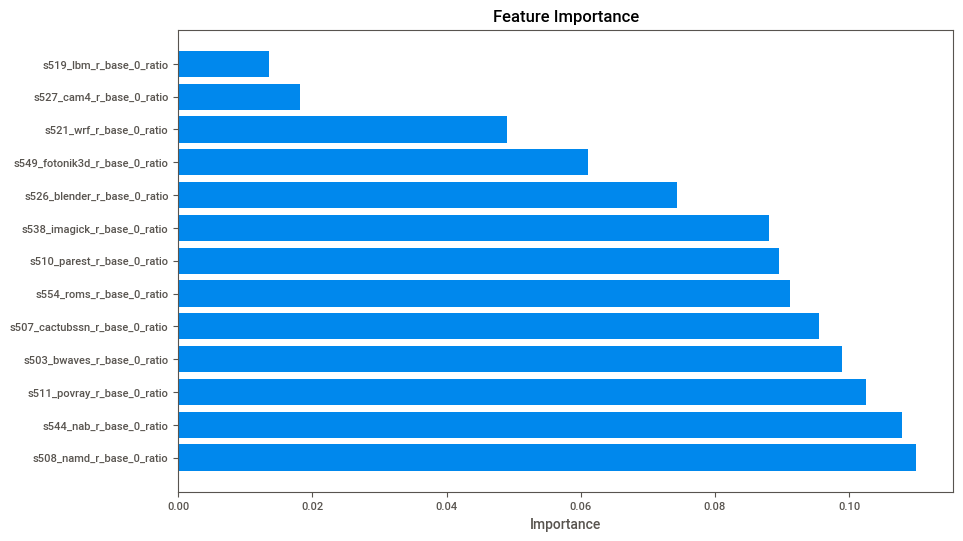

In [110]:

# Get feature importances
feature_importances = rf_model.feature_importances_

# Visualize feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [111]:

# Feature importance threshold
threshold = 0.02
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()

print(f'Features with Importance > {threshold}: {important_features}')


Features with Importance > 0.02: ['s508_namd_r_base_0_ratio', 's544_nab_r_base_0_ratio', 's511_povray_r_base_0_ratio', 's503_bwaves_r_base_0_ratio', 's507_cactubssn_r_base_0_ratio', 's554_roms_r_base_0_ratio', 's510_parest_r_base_0_ratio', 's538_imagick_r_base_0_ratio', 's526_blender_r_base_0_ratio', 's549_fotonik3d_r_base_0_ratio', 's521_wrf_r_base_0_ratio']


In [112]:

# Select top N important features
top_n = 5
selected_features = feature_importance_df['Feature'][:top_n].tolist()

print(f'Top {top_n} Important Features: {selected_features}')

Top 5 Important Features: ['s508_namd_r_base_0_ratio', 's544_nab_r_base_0_ratio', 's511_povray_r_base_0_ratio', 's503_bwaves_r_base_0_ratio', 's507_cactubssn_r_base_0_ratio']


In [113]:
# Feature importance vs. correlation
correlation_matrix = X.corr()

# Iterate through features and their importance
for feature in selected_features:
    correlation_with_target = correlation_matrix[feature]  # Replace 'target' with your actual target variable
    print(f'Correlation between {feature} and target: {correlation_with_target}')


Correlation between s508_namd_r_base_0_ratio and target: s503_bwaves_r_base_0_ratio       0.782798
s507_cactubssn_r_base_0_ratio    0.939500
s508_namd_r_base_0_ratio         1.000000
s510_parest_r_base_0_ratio       0.982595
s511_povray_r_base_0_ratio       0.994468
s519_lbm_r_base_0_ratio          0.790575
s521_wrf_r_base_0_ratio          0.969774
s526_blender_r_base_0_ratio      0.989814
s527_cam4_r_base_0_ratio         0.889746
s538_imagick_r_base_0_ratio      0.994834
s544_nab_r_base_0_ratio          0.975051
s549_fotonik3d_r_base_0_ratio    0.757714
s554_roms_r_base_0_ratio         0.827576
Name: s508_namd_r_base_0_ratio, dtype: float64
Correlation between s544_nab_r_base_0_ratio and target: s503_bwaves_r_base_0_ratio       0.715564
s507_cactubssn_r_base_0_ratio    0.886041
s508_namd_r_base_0_ratio         0.975051
s510_parest_r_base_0_ratio       0.944587
s511_povray_r_base_0_ratio       0.974919
s519_lbm_r_base_0_ratio          0.720733
s521_wrf_r_base_0_ratio          0.941243


In [114]:
# Feature engineering (example: multiplying two important features)
X['new_feature_1'] = X['s526_blender_r_base_0_ratio'] * X['s507_cactubssn_r_base_0_ratio']

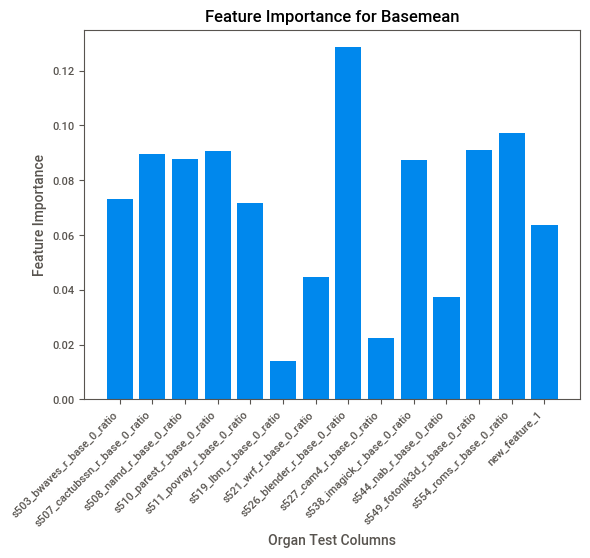

In [115]:
y = selected_columns['basemean'] 
X

rf_model = RandomForestRegressor(random_state=42)

# Fit the model
rf_model.fit(X, y)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a bar plot of feature importances
plt.bar(X.columns, feature_importances)
plt.xlabel('Organ Test Columns')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Basemean')
plt.xticks(rotation=45, ha='right')
plt.show()


Text(0.5, 1.0, 'Distribution of Overall Scores')

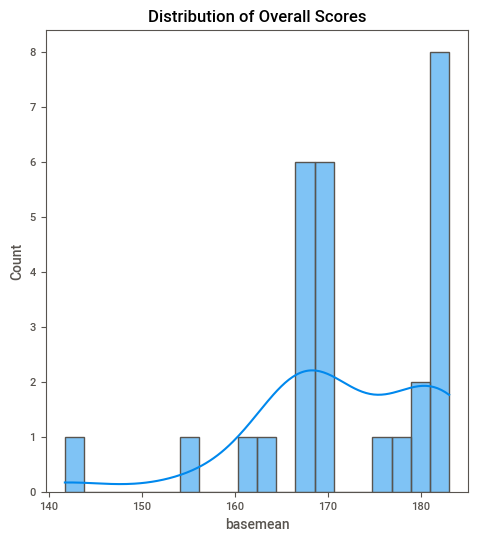

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'overall_score' and 'max_overall_score' are your column names
overall_score_column = 'basemean'
max_overall_score_column = 'peakmean'

# Data Exploration
# Histogram and Box Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df[overall_score_column], bins=20, kde=True)
plt.title('Distribution of Overall Scores')




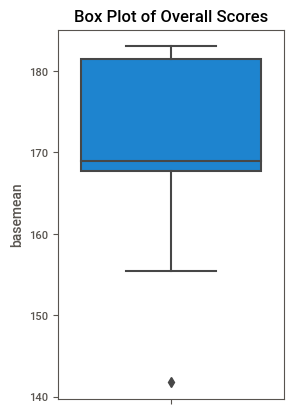

         basemean  peakmean
count   28.000000      28.0
mean   171.866698      -1.0
std      9.811855       0.0
min    141.752113      -1.0
25%    167.719458      -1.0
50%    168.951470      -1.0
75%    181.415083      -1.0
max    183.016813      -1.0


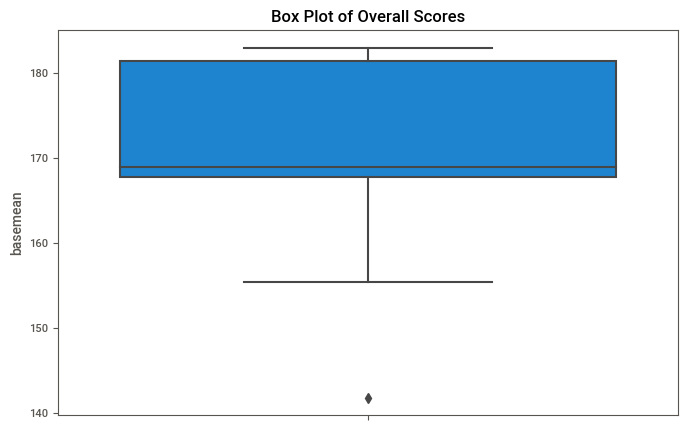

In [117]:
plt.subplot(1, 2, 2)
sns.boxplot(y=df[overall_score_column])
plt.title('Box Plot of Overall Scores')
plt.show()

# Summary Statistics
summary_stats = df[[overall_score_column, max_overall_score_column]].describe()
print(summary_stats)

# Identify Outliers
plt.figure(figsize=(8, 5))
sns.boxplot(y=df[overall_score_column])
plt.title('Box Plot of Overall Scores')
plt.show()

In [118]:
# Correlation Analysis
correlation_matrix = df[[overall_score_column, max_overall_score_column]].corr()
print(correlation_matrix)

# Feature Importance (using hypothetical machine learning model)
# Assuming X contains your input features and y is the overall score
from sklearn.ensemble import RandomForestRegressor

X = df.drop([overall_score_column, max_overall_score_column], axis=1)  # Adjust this based on your actual DataFrame
y = df[overall_score_column]

model = RandomForestRegressor()
model.fit(X, y)

# Display Feature Importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Set a threshold for feature importance
threshold = 0.02
important_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()
print(f'Features with Importance > {threshold}: {important_features}')

          basemean  peakmean
basemean       1.0       NaN
peakmean       NaN       NaN
Features with Importance > 0.02: ['s544_nab_r_base_0_reported_time', 's508_namd_r_base_0_reported_time', 's508_namd_r_base_0_ratio', 's507_cactubssn_r_base_0_ratio', 's538_imagick_r_base_0_ratio', 's503_bwaves_r_base_0_reported_time', 's526_blender_r_base_0_ratio', 's554_roms_r_base_0_ratio', 's510_parest_r_base_0_reported_time', 's511_povray_r_base_0_reported_time', 's549_fotonik3d_r_base_0_reported_time', 's538_imagick_r_base_0_reported_time', 's511_povray_r_base_0_ratio', 'cluster', 's521_wrf_r_base_0_reported_time', 's544_nab_r_base_0_ratio', 's521_wrf_r_base_0_ratio', 's507_cactubssn_r_base_0_reported_time', 's549_fotonik3d_r_base_0_ratio', 's527_cam4_r_base_0_reported_time', 's526_blender_r_base_0_reported_time', 's510_parest_r_base_0_ratio']


In [119]:
from sklearn.cluster import KMeans

# Assuming X contains your input features
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters based on your data
df['cluster'] = kmeans.fit_predict(X)


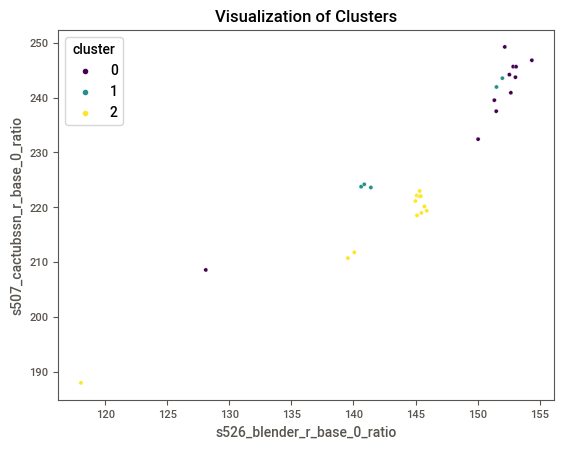

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='s526_blender_r_base_0_ratio', y='s507_cactubssn_r_base_0_ratio', hue='cluster', data=df, palette='viridis')
plt.title('Visualization of Clusters')
plt.show()


In [121]:
from scipy.stats import zscore

df['z_score'] = zscore(df[overall_score_column])
outliers = df[df['z_score'].abs() > 1]
outliers

,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_fclk_mhz,socket0_mclk_mhz,socket0_cclk_mhz,socket0_lclk_mhz,socket0_uclk_mhz,...,socket0_dimms_count,socket0_memory_channels_count,socket0_memory_manufacturers_count,socket0_memory_ranks_count,socket1_dimms_count,socket1_memory_channels_count,socket1_memory_manufacturers_count,socket1_memory_ranks_count,cluster,z_score
16518,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,1,1.062436
16698,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,0,1.157245
17906,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,0,1.032218
18942,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,0,1.120032
19171,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,2,-3.125524
20193,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,0,1.130799
20230,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,0,-1.710740
20339,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,0,1.117577
20502,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,2,-1.063787


In [122]:
df[overall_score_column]

16518    182.103324
16698    183.016813
16729    166.804753
16745    169.051131
16799    168.846529
16873    162.691186
16922    180.673270
17434    168.825586
17435    166.524151
17533    168.748445
17900    176.754389
17906    181.812169
18698    166.758623
18914    169.089121
18942    182.658268
19065    181.410883
19171    141.752113
19379    181.427683
19878    179.069142
20011    168.536462
20091    178.414644
20177    168.024360
20193    182.762006
20230    155.383635
20339    182.634608
20403    168.025385
20502    161.617056
20558    168.851809
Name: basemean, dtype: float64

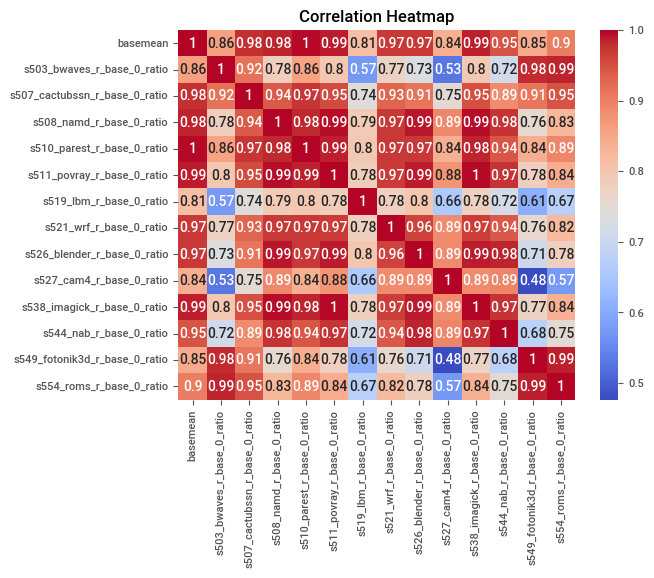

In [123]:
sns.heatmap(selected_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# What have been done

## 1. Feature Importance - Linear vs non linear Relationship
## 2. Detecting Outlier
## 3. Predicting Basemean/Peakmean
## 4. Clustering 

### Observations 
1. Linear relationship between the test feature are very high
2. Non linear relationship gives good insights - Top 5 Important Features: ['s526_blender_r_base_0_ratio', 's507_cactubssn_r_base_0_ratio', 's511_povray_r_base_0_ratio', 's508_namd_r_base_0_ratio', 's544_nab_r_base_0_ratio']
and did some Feature engineering for testing and confirm these testing feature are importance.


In [124]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data,
 test_size=0.2,
 random_state=42,
 shuffle=True)
train_set

,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_fclk_mhz,socket0_mclk_mhz,socket0_cclk_mhz,socket0_lclk_mhz,socket0_uclk_mhz,...,socket0_dimms_count,socket0_memory_channels_count,socket0_memory_manufacturers_count,socket0_memory_ranks_count,socket1_dimms_count,socket1_memory_channels_count,socket1_memory_manufacturers_count,socket1_memory_ranks_count,cluster,z_score
19379,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,1,0.992313
20193,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,0,1.130799
17906,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,0,1.032218
18914,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,2,-0.288278
19065,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,0,0.990569
16698,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,0,1.157245
16799,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,2,-0.313456
16873,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,2,-0.952306
16729,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,1,-0.525368
19171,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,2,-3.125524


In [125]:
t_train = train_set['basemean'].copy()
X_train = train_set.drop(labels='basemean', axis=1)
# axis=1 means it's a column in the dataframe

t_train.shape, X_train.shape

((22,), (22, 75))

In [126]:
t_test = test_set['basemean'].copy()
X_test = test_set.drop(labels='basemean', axis=1)

t_test.shape, X_test.shape

((6,), (6, 75))

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Assume 'X' contains the test columns, and 'y' contains the overall scores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the test set
predictions = knn_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 27.10775466322211


In [128]:
X_train

,dimm_slots_total,dimm_slots_populated,memory_channels_total,memory_channels_populated,dimms_per_channel,socket0_fclk_mhz,socket0_mclk_mhz,socket0_cclk_mhz,socket0_lclk_mhz,socket0_uclk_mhz,...,system_memory_ranks_count,socket0_dimms_count,socket0_memory_channels_count,socket0_memory_manufacturers_count,socket0_memory_ranks_count,socket1_dimms_count,socket1_memory_channels_count,socket1_memory_manufacturers_count,socket1_memory_ranks_count,cluster
19379,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,0
20193,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,0
17906,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,0
18914,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,1
19065,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,0
16698,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,0
16799,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,1
16873,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,1
16729,32.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,2
19171,16.0,16.0,16.0,16.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.0,8.0,8.0,1.0,1.0,8.0,8.0,1.0,1.0,3


In [129]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame with test columns and overall score
test_columns = selected_columns  # Selecting relevant columns
overall_score = data['basemean']

# Combine test columns and overall score
combined_data = pd.concat([test_columns, overall_score], axis=1)

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(combined_data)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3)  # Specify the number of clusters
kmeans.fit(normalized_data)

# Add cluster labels to the DataFrame
combined_data['Cluster'] = kmeans.labels_

# Analyze the results
cluster_summary = combined_data.groupby('Cluster').mean()
print(cluster_summary)


           basemean  s503_bwaves_r_base_0_ratio  \
Cluster                                           
0        148.567874                  495.892880   
1        181.061433                  555.653552   
2        167.313900                  506.479678   

         s507_cactubssn_r_base_0_ratio  s508_namd_r_base_0_ratio  \
Cluster                                                            
0                           198.297152                 74.798832   
1                           242.588168                 95.774747   
2                           220.109525                 88.864021   

         s510_parest_r_base_0_ratio  s511_povray_r_base_0_ratio  \
Cluster                                                           
0                        139.659712                  117.014704   
1                        172.241061                  150.390053   
2                        158.491321                  139.066146   

         s519_lbm_r_base_0_ratio  s521_wrf_r_base_0_ratio  \
Cluste

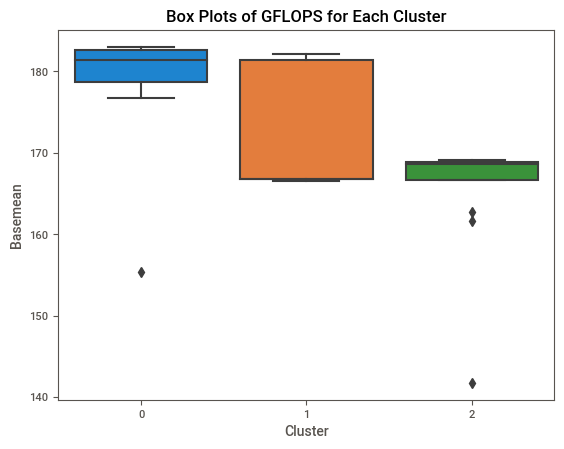

In [130]:
sns.boxplot(x='cluster', y='basemean', data=data)
plt.xlabel('Cluster')
plt.ylabel('Basemean')
plt.title('Box Plots of GFLOPS for Each Cluster')
plt.show()
